In [ ]:
import pandas as pd 
inputdf=pd.read_csv("C:\Files\cs_accepts.csv")

In [ ]:
inputdf
pd.set_option("display.max_columns", None)
inputdf

In [6]:
# Count the number of missing values for each column 
inputdf.isnull().sum()

TITLE         0
CHILDREN      0
PERS_H        0
AGE           0
TMADD         0
TMJOB1        0
TEL           0
NMBLOAN       0
FINLOAN       0
INCOME        0
EC_CARD       0
STATUS        0
BUREAU        0
LOCATION      0
LOANS         0
REGN          0
DIV           0
CASH          0
PRODUCT      12
RESID       535
NAT           0
PROF          1
CAR           0
CARDS         0
GB            0
_freq_        0
dtype: int64

In [11]:
# One Way Freq
print(inputdf['PRODUCT'].value_counts(dropna=False, normalize=True))
print(inputdf['RESID'].value_counts(dropna=False, normalize=True))
print(inputdf['PROF'].value_counts(dropna=False, normalize=True))

Radio, TV, Hifi     0.477333
Furniture,Carpet    0.294667
Dept. Store,Mail    0.133000
Cars                0.068667
Leisure             0.022000
NaN                 0.004000
Others              0.000333
Name: PRODUCT, dtype: float64
Lease    0.780000
NaN      0.178333
Owner    0.041667
Name: RESID, dtype: float64
Others              0.724667
Civil Service, M    0.085667
Food,Building,Ca    0.077333
Pensioner           0.045333
Self-employed pe    0.022333
Military Service    0.013667
State,Steel Ind,    0.013333
Sea Vojage, Gast    0.008667
Chemical Industr    0.008667
NaN                 0.000333
Name: PROF, dtype: float64


In [12]:
# Imputation for Categorical Variable 
values={'PRODUCT': 'Others' , 'RESID' : 'Null'}
inputdf=inputdf.fillna(value=values)


In [14]:
# Delete null records
inputdf=inputdf[inputdf['PROF'].isnull() == False]

In [25]:
# Check Categorical Variables 
inputdf['TITLE'].value_counts()
inputdf['CHILDREN'].value_counts()
# 23 is meaningless I will delete it 
inputdf=inputdf[inputdf['CHILDREN'] <9]
inputdf
inputdf['TEL'].value_counts()
# So Granular, Consolidate
inputdf["TEL"].replace({0:1}, inplace=True)
inputdf['BUREAU'].value_counts()
inputdf['NAT'].value_counts()

German              2493
Turkish              310
Others                79
Greek                 44
Other European        23
Yugoslav              23
Italian               19
Spanish/Portugue       7
Name: NAT, dtype: int64

In [31]:
print(inputdf['PROF'].value_counts(dropna=False, normalize=True))
# I would like to factorize Prof variable
Factorized_Prof=pd.DataFrame(inputdf.groupby(inputdf['PROF']).mean().GB)
Factorized_Prof.rename(columns={'GB': 'Prof_Fact'}, inplace=True)
inputdf2=pd.merge(inputdf, Factorized_Prof, how='inner', on='PROF')

Others              0.724817
Civil Service, M    0.085724
Food,Building,Ca    0.077385
Pensioner           0.045364
Self-employed pe    0.022348
Military Service    0.013676
State,Steel Ind,    0.013342
Sea Vojage, Gast    0.008672
Chemical Industr    0.008672
Name: PROF, dtype: float64


In [34]:
# Select Variables
X=inputdf2[['CHILDREN','AGE','TMJOB1', 'INCOME', 'RESID', 'BUREAU', 'Prof_Fact' ]]
Target=inputdf['GB']

In [40]:
# Generate Dummy Variables 
X=pd.get_dummies(X)


In [41]:
X

,CHILDREN,AGE,TMJOB1,INCOME,BUREAU,Prof_Fact,RESID_Lease,RESID_Null,RESID_Owner
0,0,46,33.0,0.0,3.0,0.514496,1,0,0
1,3,31,120.0,3300.0,1.0,0.514496,1,0,0
2,0,39,6.0,1500.0,1.0,0.514496,1,0,0
3,0,23,60.0,0.0,1.0,0.514496,1,0,0
4,0,42,30.0,1900.0,3.0,0.514496,1,0,0
...,...,...,...,...,...,...,...,...,...
2993,1,27,72.0,2800.0,1.0,0.536585,1,0,0
2994,2,43,288.0,2600.0,1.0,0.536585,1,0,0
2995,0,20,18.0,2000.0,1.0,0.536585,1,0,0
2996,1,47,336.0,4000.0,1.0,0.536585,0,0,1


In [42]:
# Data Partition 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Target, test_size=0.33, random_state=42)

In [44]:
print(X_train.describe())
print(X_test.describe())

          CHILDREN          AGE       TMJOB1         INCOME       BUREAU  \
count  2008.000000  2008.000000  2008.000000    2008.000000  2008.000000   
mean      0.820717    33.933267    78.896414    2010.308765     1.663347   
std       1.044944    10.774933   121.358578    2644.321233     0.940275   
min       0.000000    18.000000     0.000000       0.000000     1.000000   
25%       0.000000    26.000000    18.000000    1000.000000     1.000000   
50%       0.000000    31.000000    39.000000    2100.000000     1.000000   
75%       1.000000    40.000000    96.000000    2700.000000     3.000000   
max       8.000000    71.000000   999.000000  100000.000000     3.000000   

         Prof_Fact  RESID_Lease   RESID_Null  RESID_Owner  
count  2008.000000  2008.000000  2008.000000  2008.000000  
mean      0.499600     0.784861     0.173307     0.041833  
std       0.061831     0.411021     0.378607     0.200257  
min       0.338235     0.000000     0.000000     0.000000  
25%       0.514

In [50]:
# Run Your Decision Tree 
from sklearn.tree  import DecisionTreeClassifier
from sklearn import metrics
from sklearn import tree
from sklearn.tree import export_text

# Train the model with using DTC

Clf=DecisionTreeClassifier(criterion='gini', max_depth=5)
clf1=Clf.fit(X_train, y_train)

[Text(139.5, 199.32, 'X[3] <= 1550.0\ngini = 0.5\nsamples = 2008\nvalue = [985, 1023]'),
 Text(60.872727272727275, 163.07999999999998, 'X[0] <= 4.5\ngini = 0.499\nsamples = 643\nvalue = [337, 306]'),
 Text(50.727272727272734, 126.83999999999999, 'X[0] <= 3.5\ngini = 0.499\nsamples = 639\nvalue = [333, 306]'),
 Text(40.581818181818186, 90.6, 'X[2] <= 312.0\ngini = 0.499\nsamples = 636\nvalue = [333, 303]'),
 Text(20.290909090909093, 54.359999999999985, 'X[2] <= 156.0\ngini = 0.499\nsamples = 610\nvalue = [315, 295]'),
 Text(10.145454545454546, 18.119999999999976, 'gini = 0.498\nsamples = 556\nvalue = [294, 262]'),
 Text(30.436363636363637, 18.119999999999976, 'gini = 0.475\nsamples = 54\nvalue = [21, 33]'),
 Text(60.872727272727275, 54.359999999999985, 'X[3] <= 500.0\ngini = 0.426\nsamples = 26\nvalue = [18, 8]'),
 Text(50.727272727272734, 18.119999999999976, 'gini = 0.375\nsamples = 24\nvalue = [18, 6]'),
 Text(71.01818181818183, 18.119999999999976, 'gini = 0.0\nsamples = 2\nvalue = [0

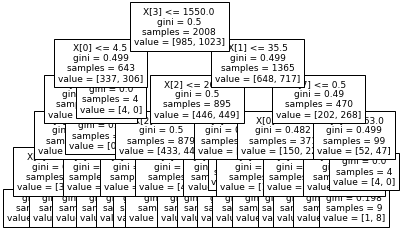

In [53]:
tree.plot_tree(clf1, fontsize=9)

In [58]:
feat_importance=pd.DataFrame(clf1.tree_.compute_feature_importances(normalize=False))
degiskenler=pd.DataFrame(X_train.columns.values)
mergedDF=degiskenler.merge(feat_importance, left_index=True, right_index=True)

In [59]:
mergedDF

,0_x,0_y
0,CHILDREN,0.003782
1,AGE,0.004724
2,TMJOB1,0.004932
3,INCOME,0.003003
4,BUREAU,0.000000
5,Prof_Fact,0.002022
6,RESID_Lease,0.000000
7,RESID_Null,0.001840
8,RESID_Owner,0.000000


In [61]:
tree_rules=export_text(clf1, feature_names=list(X_train.columns))
print(tree_rules)

|--- INCOME <= 1550.00
|   |--- CHILDREN <= 4.50
|   |   |--- CHILDREN <= 3.50
|   |   |   |--- TMJOB1 <= 312.00
|   |   |   |   |--- TMJOB1 <= 156.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- TMJOB1 >  156.00
|   |   |   |   |   |--- class: 1
|   |   |   |--- TMJOB1 >  312.00
|   |   |   |   |--- INCOME <= 500.00
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- INCOME >  500.00
|   |   |   |   |   |--- class: 1
|   |   |--- CHILDREN >  3.50
|   |   |   |--- class: 1
|   |--- CHILDREN >  4.50
|   |   |--- class: 0
|--- INCOME >  1550.00
|   |--- AGE <= 35.50
|   |   |--- TMJOB1 <= 204.00
|   |   |   |--- TMJOB1 <= 4.50
|   |   |   |   |--- INCOME <= 1850.00
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- INCOME >  1850.00
|   |   |   |   |   |--- class: 0
|   |   |   |--- TMJOB1 >  4.50
|   |   |   |   |--- CHILDREN <= 4.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- CHILDREN >  4.50
|   |   |   |   |   |--- class: 0
|   |   |--- TMJOB1 >  204.00
| 

In [62]:
# Calculate the Prob predictions of the DT Model 
Train_probs=clf1.predict_proba(X_train)

In [63]:
Train_probs

array([[0.52877698, 0.47122302],
       [0.40361446, 0.59638554],
       [0.48218527, 0.51781473],
       ...,
       [0.52877698, 0.47122302],
       [0.52877698, 0.47122302],
       [0.38888889, 0.61111111]])

In [66]:
Test_probs=clf1.predict_proba(X_test)
Test_Forecasts=clf1.predict(X_test)

In [68]:
Test_probs

array([[0.54651163, 0.45348837],
       [0.48218527, 0.51781473],
       [0.27358491, 0.72641509],
       ...,
       [0.48218527, 0.51781473],
       [0.52877698, 0.47122302],
       [0.52877698, 0.47122302]])

In [73]:
# Check Model Performance
# Decision , Ranking, Estimate
Test_probsdf=pd.DataFrame({'Prob0': Test_probs[:,0], 'Prob1': Test_probs[:,1]})
Test_Forecasts=pd.DataFrame(Test_Forecasts, columns=['Predictions'])
Test_probsdf
Test_Forecasts
X_test
# I should rest Index to merge
X_test=X_test.reset_index(drop=True)

In [78]:
X_test
df_withmodeloutput=pd.merge(X_test, Test_probsdf, left_index=True, right_index=True)
df_withmodeloutput2=pd.merge(df_withmodeloutput, Test_Forecasts, left_index=True, right_index=True)
df_withmodeloutput2=pd.merge(df_withmodeloutput2, y_test, left_index=True, right_index=True)
df_withmodeloutput2

,CHILDREN,AGE,TMJOB1,INCOME,BUREAU,Prof_Fact,RESID_Lease,RESID_Null,RESID_Owner,Prob0,Prob1,Predictions,GB
0,4,48,96.0,3500.0,1.0,0.514496,0,1,0,0.546512,0.453488,0,0
8,0,29,18.0,4000.0,1.0,0.508621,1,0,0,0.482185,0.517815,1,1
13,0,31,192.0,3400.0,3.0,0.508621,0,1,0,0.482185,0.517815,1,1
15,0,19,45.0,1800.0,3.0,0.461538,1,0,0,0.482185,0.517815,1,1
26,1,40,240.0,2200.0,3.0,0.514496,1,0,0,0.523256,0.476744,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
966,0,21,12.0,1500.0,3.0,0.514496,1,0,0,0.528777,0.471223,0,0
970,0,27,36.0,2200.0,1.0,0.525000,1,0,0,0.482185,0.517815,1,1
977,0,24,45.0,2200.0,3.0,0.514496,0,1,0,0.482185,0.517815,1,0
979,2,31,84.0,1800.0,3.0,0.514496,0,0,1,0.482185,0.517815,1,0


In [79]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score 
roc_auc_score(df_withmodeloutput2['GB'], df_withmodeloutput2['Prob1'])

0.5236526946107785